In [ ]:
!pip install langdetect
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=7c19ff442e975e70139a64715929e29ad40dc79cae39f08ec3e16958edc72c4d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
import numpy as np
from langdetect import detect
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer,PatternAnalyzer

In [ ]:
!wget https://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2024-03-30/data/listings.csv.gz
!gzip -d listings.csv.gz

--2024-06-01 13:51:32--  https://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2024-03-30/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 99.84.108.126, 99.84.108.41, 99.84.108.90, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|99.84.108.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302810 (2.2M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>]   2.20M  12.9MB/s    in 0.2s    

2024-06-01 13:51:33 (12.9 MB/s) - ‘listings.csv.gz’ saved [2302810/2302810]



In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("listings.csv")
df_Host = df[['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'reviews_per_month']].copy()
df_Host_clean = df_Host.dropna(how='any')
df_Host_cleaned = df_Host_clean[df_Host_clean['host_response_time'] != 'N/A']
df_Host_cleaned['host_response_time'].value_counts()

host_response_time
within an hour        1352
within a day           564
within a few hours     466
a few days or more     152
Name: count, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# forest

In [ ]:
# Data preprocessing
df_Host_cleaned['host_is_superhost'] = df_Host_cleaned['host_is_superhost'].map({'t': 1, 'f': 0})
df_Host_cleaned['host_response_time'] = df_Host_cleaned['host_response_time'].map({'within an hour': 0, 'within a few hours' : 1, 'within a day': 2, 'a few days or more': 3})
df_Host_cleaned['host_response_rate'] = df_Host_cleaned['host_response_rate'].astype(str).str.rstrip('%').astype(float) / 100
df_Host_cleaned['host_acceptance_rate'] = df_Host_cleaned['host_acceptance_rate'].astype(str).str.rstrip('%').astype(float) / 100


# Split features and target variable
X = df_Host_cleaned[['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost']]
y = df_Host_cleaned['review_scores_communication']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

KeyError: 'review_scores_communication'

# keras

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Data preprocessing
df_Host_cleaned['host_is_superhost'] = df_Host_cleaned['host_is_superhost'].map({'t': 1, 'f': 0})
df_Host_cleaned['host_response_time'] = df_Host_cleaned['host_response_time'].map({'within an hour': 0, 'within a few hours' : 1, 'within a day': 2, 'a few days or more': 3})
df_Host_cleaned['host_response_rate'] = df_Host_cleaned['host_response_rate'].astype(str).str.rstrip('%').astype(float) / 100
df_Host_cleaned['host_acceptance_rate'] = df_Host_cleaned['host_acceptance_rate'].astype(str).str.rstrip('%').astype(float) / 100

# Split features and target variable
X = df_Host_cleaned[['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost']]
y = df_Host_cleaned['reviews_per_month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 4.4116 - val_loss: 1.8593
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 4.1717 - val_loss: 1.8258
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 4.1574 - val_loss: 1.7942
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 4.1455 - val_loss: 1.7975
Epoch 5/50
163/163 [==============================] - 0s 2ms/step - loss: 4.1476 - val_loss: 1.7677
Epoch 6/50
163/163 [==============================] - 0s 2ms/step - loss: 4.1329 - val_loss: 1.7577
Epoch 7/50
163/163 [==============================] - 0s 2ms/step - loss: 4.1514 - val_loss: 1.7879
Epoch 8/50
163/163 [==============================] - 0s 2ms/step - loss: 4.1373 - val_loss: 1.7540
Epoch 9/50
163/163 [==============================] - 0s 2ms/step - loss: 4.1073 - val_loss: 1.7504
Epoch 10/50
163/163 [==============================] - 0s 2ms/step - loss: 4.1097 - val_loss: 1.7863

313/313 [==============================] - 1s 2ms/step


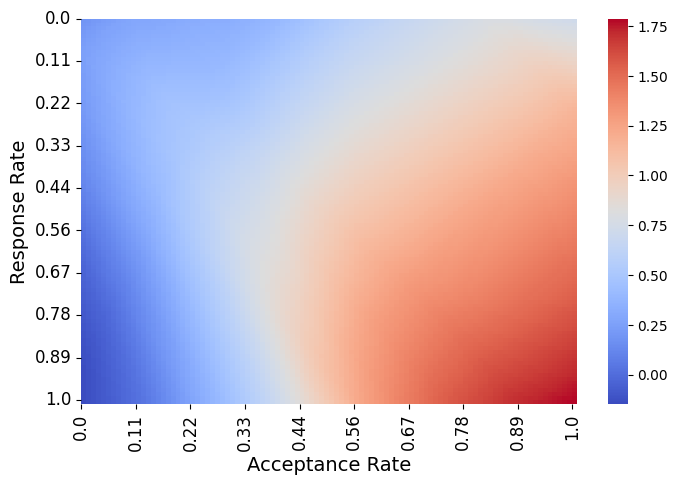

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Generate grid of values for acceptance rate and response rate
acceptance_rate_range = np.linspace(0, 1, 100)  # 0-100% scaled to 0-1
response_rate_range = np.linspace(0, 1, 100)    # 0-100% scaled to 0-1

# Create a meshgrid
acceptance_rate_grid, response_rate_grid = np.meshgrid(acceptance_rate_range, response_rate_range)

# Flatten the grid arrays
acceptance_rate_flat = acceptance_rate_grid.flatten()
response_rate_flat = response_rate_grid.flatten()

# Create input data based on the grid
input_data = np.column_stack((
    np.ones_like(acceptance_rate_flat),  # host_response_time (assumed constant)
    response_rate_flat,
    acceptance_rate_flat,
    np.ones_like(acceptance_rate_flat)  # host_is_superhost (assumed constant)
))

# Predict using the model
predictions = model.predict(input_data)

# Reshape predictions to match the grid shape
predictions_grid = predictions.reshape(acceptance_rate_grid.shape)

# Plot the heat map
plt.figure(figsize=(8, 5))
ax = sns.heatmap(predictions_grid, cmap='coolwarm')

# Customize tick labels
num_ticks = 10  # Set the number of ticks for better readability
tick_positions = np.linspace(0, 99, num_ticks).astype(int)
tick_labels = np.round(np.linspace(0, 1, num_ticks), 2)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.set_yticks(tick_positions)
ax.set_yticklabels(tick_labels)

plt.xlabel('Acceptance Rate', fontsize=14)
plt.ylabel('Response Rate', fontsize=14)
# plt.title('Heatmap of Predicted Values', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


12/12 [==============================] - 0s 4ms/step


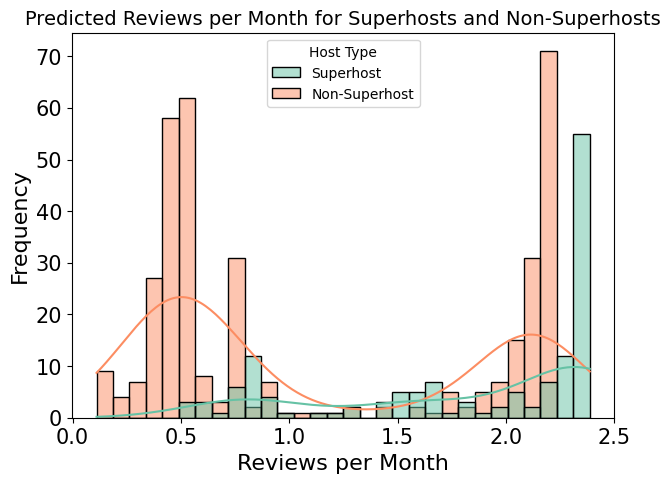

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter test data for superhosts and non-superhosts
X_superhost = X_test[X_test['host_is_superhost'] == 1]
X_non_superhost = X_test[X_test['host_is_superhost'] == 0]

# Predict reviews_per_month for superhosts and non-superhosts
y_pred_superhost = model.predict(X_superhost)
y_pred_non_superhost = model.predict(X_non_superhost)

# Create a DataFrame to store the predictions and their corresponding group
df_pred_superhost = pd.DataFrame({'Predicted Reviews per Month': y_pred_superhost.flatten(), 'Host Type': 'Superhost'})
df_pred_non_superhost = pd.DataFrame({'Predicted Reviews per Month': y_pred_non_superhost.flatten(), 'Host Type': 'Non-Superhost'})

# Concatenate the predictions
df_combined = pd.concat([df_pred_superhost, df_pred_non_superhost])

# Create the heat map
plt.figure(figsize=(7, 5))
sns.histplot(data=df_combined, x='Predicted Reviews per Month', hue='Host Type', bins=30, kde=True, palette='Set2')
plt.title('Predicted Reviews per Month for Superhosts and Non-Superhosts', fontsize=14)
plt.xlabel('Reviews per Month', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


2/2 [==============================] - 0s 8ms/step


<ipython-input-73-3e21e2240432>:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_combined_response_time, x='Host Response Time', y='Predicted Reviews per Month', ci=None, palette=custom_palette)
<ipython-input-73-3e21e2240432>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_combined_response_time, x='Host Response Time', y='Predicted Reviews per Month', ci=None, palette=custom_palette)


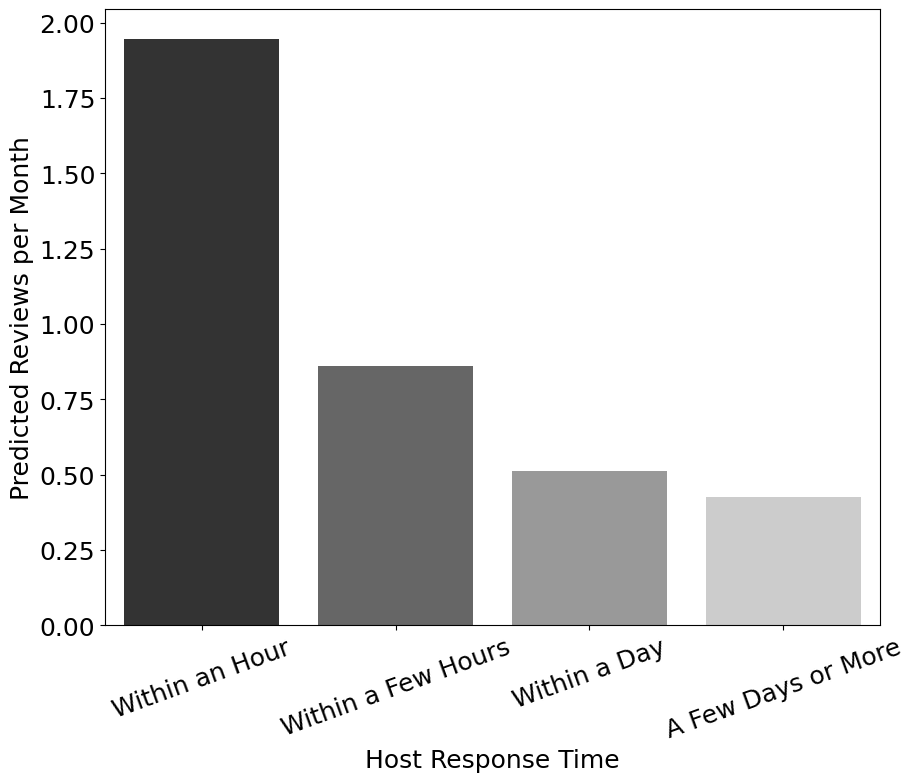

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with varying shades of green
custom_palette = sns.color_palette("gray", n_colors=4)

# Reverse the order of colors to sort from dark to light
custom_palette = custom_palette[::]

# Filter test data for different categories of host_response_time
response_time_0 = X_test[X_test['host_response_time'] == 0]
response_time_1 = X_test[X_test['host_response_time'] == 1]
response_time_2 = X_test[X_test['host_response_time'] == 2]
response_time_3 = X_test[X_test['host_response_time'] == 3]

# Predict reviews_per_month for each category of host_response_time
y_pred_0 = model.predict(response_time_0)
y_pred_1 = model.predict(response_time_1)
y_pred_2 = model.predict(response_time_2)
y_pred_3 = model.predict(response_time_3)

# Create DataFrames for the predictions and their corresponding categories
df_pred_0 = pd.DataFrame({'Predicted Reviews per Month': y_pred_0.flatten(), 'Host Response Time': 'Within an Hour'})
df_pred_1 = pd.DataFrame({'Predicted Reviews per Month': y_pred_1.flatten(), 'Host Response Time': 'Within a Few Hours'})
df_pred_2 = pd.DataFrame({'Predicted Reviews per Month': y_pred_2.flatten(), 'Host Response Time': 'Within a Day'})
df_pred_3 = pd.DataFrame({'Predicted Reviews per Month': y_pred_3.flatten(), 'Host Response Time': 'A Few Days or More'})

# Concatenate the predictions
df_combined_response_time = pd.concat([df_pred_0, df_pred_1, df_pred_2, df_pred_3])

# Create the bar plot with custom color palette
plt.figure(figsize=(10, 8))
sns.barplot(data=df_combined_response_time, x='Host Response Time', y='Predicted Reviews per Month', ci=None, palette=custom_palette)
# plt.title('Predicted Reviews per Month for Different Host Response Times', fontsize=18)
plt.xlabel('Host Response Time', fontsize=18)
plt.ylabel('Predicted Reviews per Month', fontsize=18)
plt.xticks(rotation=20, fontsize=18)
plt.yticks(fontsize=18)
plt.show()


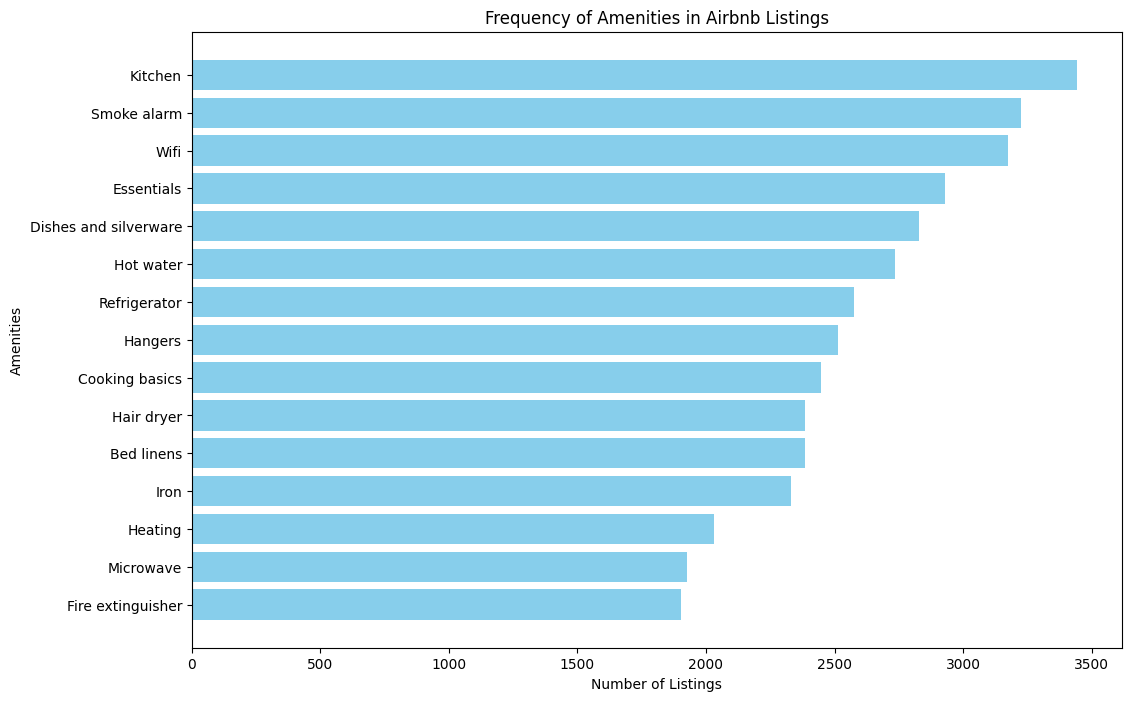

In [ ]:
import matplotlib.pyplot as plt

# Data
amenities = {
    'Kitchen': 3445,
    'Smoke alarm': 3226,
    'Wifi': 3173,
    'Essentials': 2930,
    'Dishes and silverware': 2829,
    'Hot water': 2736,
    'Refrigerator': 2575,
    'Hangers': 2512,
    'Cooking basics': 2446,
    'Hair dryer': 2386,
    'Bed linens': 2384,
    'Iron': 2329,
    'Heating': 2030,
    'Microwave': 1927,
    'Fire extinguisher': 1903
}

# Create bar chart
plt.figure(figsize=(12, 8))
plt.barh(list(amenities.keys()), list(amenities.values()), color='skyblue')
plt.xlabel('Number of Listings')
plt.ylabel('Amenities')
plt.title('Frequency of Amenities in Airbnb Listings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()
